<a href="https://colab.research.google.com/github/karthik7SRM/DataScienceTeam02/blob/main/internshipEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1-Loading the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

df = pd.read_csv("tweets_with_sentiment.csv")
df.head()


Saving tweets_with_sentiment.csv to tweets_with_sentiment (2).csv


,Tweet_ID,Username,Text_cleaned,Retweets,Likes,month,date,time,Followers,Hashtags_cleaned,hashtags1,hashtags2,hashtags3,tokens,Category,Compound_Score,Sentiment
0,1,julie81,party least receive say or single. prevent pre...,2,25,Jan,30-01-2023,11:00:51,60,"party, least, receive",party,least,receive,"['party', 'receive', 'single', 'prevent', 'pre...",finance,0.8885,Positive
1,2,richardhester,hotel still congress may member staff. media d...,35,29,Jan,02-01-2023,22:45:58,84,"hotel, still, congress",hotel,still,congress,"['hotel', 'congress', 'member', 'staff', 'medi...",politics,0.2960,Positive
2,3,williamsjoseph,nice be her debate industry that year. film wh...,51,25,Jan,18-01-2023,11:25:19,89,"nice, debate, industry",nice,debate,industry,"['nice', 'debate', 'industry', 'year', 'film',...",cinema,0.8481,Positive
3,4,danielsmary,laugh explain situation career occur serious. ...,37,18,Apr,10-04-2023,22:06:29,76,"laugh, explain, situation",laugh,explain,situation,"['laugh', 'explain', 'situation', 'career', 'o...",technology,0.6249,Positive
4,5,carlwarren,involve sense former often approach government...,27,80,Jan,24-01-2023,07:12:21,115,"involve, sense, former",involve,sense,former,"['involve', 'sense', 'approach', 'government',...",technology,0.6705,Positive


2-Understanding the Structure

In [ ]:
df.isnull().sum()


,0
Tweet_ID,0
Username,0
Text_cleaned,0
Retweets,0
Likes,0
month,0
date,0
time,0
Followers,0
Hashtags_cleaned,0


In [ ]:
# duplicate check
df_temp = df.copy()
df_temp['tokens'] = df_temp['tokens'].astype(str)

# Check duplicates now
duplicate_count = df_temp.duplicated().sum()
print("Duplicate rows:", duplicate_count)

Duplicate rows: 0


In [ ]:
import ast
df['tokens'] = df['tokens'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [ ]:
#understanding the dataset structure
# Shape of the dataset (rows, columns)
print("Shape of dataset:", df.shape)

# Column names
print("\nColumn names:")
print(df.columns.tolist())

# Info about data types and non-null counts
print("\nDataset Info:")
df.info()

# Quick look at the first few rows (optional)
df.head()


Shape of dataset: (10000, 17)

Column names:
['Tweet_ID', 'Username', 'Text_cleaned', 'Retweets', 'Likes', 'month', 'date', 'time', 'Followers', 'Hashtags_cleaned', 'hashtags1', 'hashtags2', 'hashtags3', 'tokens', 'Category', 'Compound_Score', 'Sentiment']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Tweet_ID          10000 non-null  int64         
 1   Username          10000 non-null  object        
 2   Text_cleaned      10000 non-null  object        
 3   Retweets          10000 non-null  int64         
 4   Likes             10000 non-null  int64         
 5   month             10000 non-null  object        
 6   date              10000 non-null  datetime64[ns]
 7   time              10000 non-null  object        
 8   Followers         10000 non-null  int64         
 9   Hashtags_cleaned  100

,Tweet_ID,Username,Text_cleaned,Retweets,Likes,month,date,time,Followers,Hashtags_cleaned,hashtags1,hashtags2,hashtags3,tokens,Category,Compound_Score,Sentiment
0,1,julie81,party least receive say or single. prevent pre...,2,25,Jan,2023-01-30,11:00:51,60,"party, least, receive",party,least,receive,"[party, receive, single, prevent, prevent, hus...",finance,0.8885,Positive
1,2,richardhester,hotel still congress may member staff. media d...,35,29,Jan,2023-01-02,22:45:58,84,"hotel, still, congress",hotel,still,congress,"[hotel, congress, member, staff, medium, draw,...",politics,0.2960,Positive
2,3,williamsjoseph,nice be her debate industry that year. film wh...,51,25,Jan,2023-01-18,11:25:19,89,"nice, debate, industry",nice,debate,industry,"[nice, debate, industry, year, film, generatio...",cinema,0.8481,Positive
3,4,danielsmary,laugh explain situation career occur serious. ...,37,18,Apr,2023-04-10,22:06:29,76,"laugh, explain, situation",laugh,explain,situation,"[laugh, explain, situation, career, occur, par...",technology,0.6249,Positive
4,5,carlwarren,involve sense former often approach government...,27,80,Jan,2023-01-24,07:12:21,115,"involve, sense, former",involve,sense,former,"[involve, sense, approach, government, season,...",technology,0.6705,Positive


3-Summary

In [ ]:
# Summary statistics for numerical columns
df.describe()


,Tweet_ID,Retweets,Likes,date,Followers,Compound_Score
count,10000.00000,10000.000000,10000.000000,10000,10000.000000,10000.000000
mean,5000.50000,49.721200,49.929300,2023-03-08 07:56:55.680000,103.084400,0.442993
min,1.00000,0.000000,0.000000,2023-01-01 00:00:00,0.000000,-0.938200
25%,2500.75000,25.000000,25.000000,2023-02-02 00:00:00,88.000000,0.177900
50%,5000.50000,49.000000,50.000000,2023-03-08 00:00:00,106.000000,0.599400
75%,7500.25000,75.000000,75.000000,2023-04-11 00:00:00,121.000000,0.807400
max,10000.00000,100.000000,100.000000,2023-05-15 00:00:00,150.000000,0.980300
std,2886.89568,28.948856,28.877193,NaN,24.173343,0.452152


4-Missing Value Analysis

In [ ]:
# Total missing values per column
print("Missing values per column:")
print(df.isnull().sum())

# Percentage of missing values per column (optional but useful)
print("\nPercentage of missing values:")
print((df.isnull().sum() / len(df)) * 100)


Missing values per column:
Tweet_ID            0
Username            0
Text_cleaned        0
Retweets            0
Likes               0
month               0
date                0
time                0
Followers           0
Hashtags_cleaned    0
hashtags1           0
hashtags2           0
hashtags3           0
tokens              0
Category            0
Compound_Score      0
Sentiment           0
dtype: int64

Percentage of missing values:
Tweet_ID            0.0
Username            0.0
Text_cleaned        0.0
Retweets            0.0
Likes               0.0
month               0.0
date                0.0
time                0.0
Followers           0.0
Hashtags_cleaned    0.0
hashtags1           0.0
hashtags2           0.0
hashtags3           0.0
tokens              0.0
Category            0.0
Compound_Score      0.0
Sentiment           0.0
dtype: float64


5-Data Type Checks & Corrections

In [ ]:
# Check current data types
df.dtypes

,0
Tweet_ID,int64
Username,object
Text_cleaned,object
Retweets,int64
Likes,int64
month,object
date,datetime64[ns]
time,object
Followers,int64
Hashtags_cleaned,object


6-Univariate Analysis

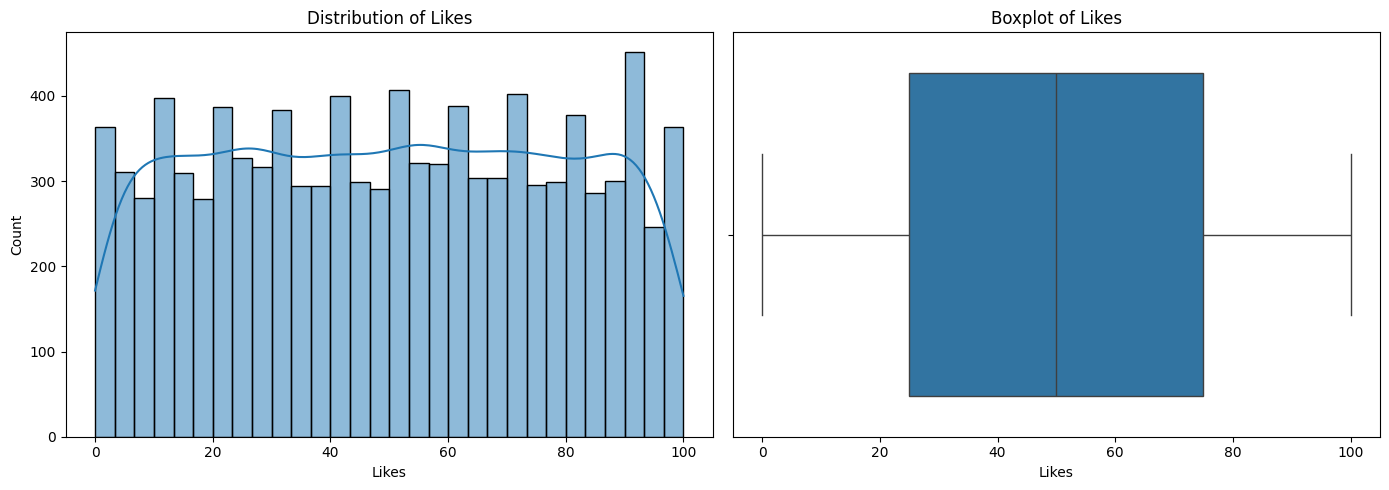

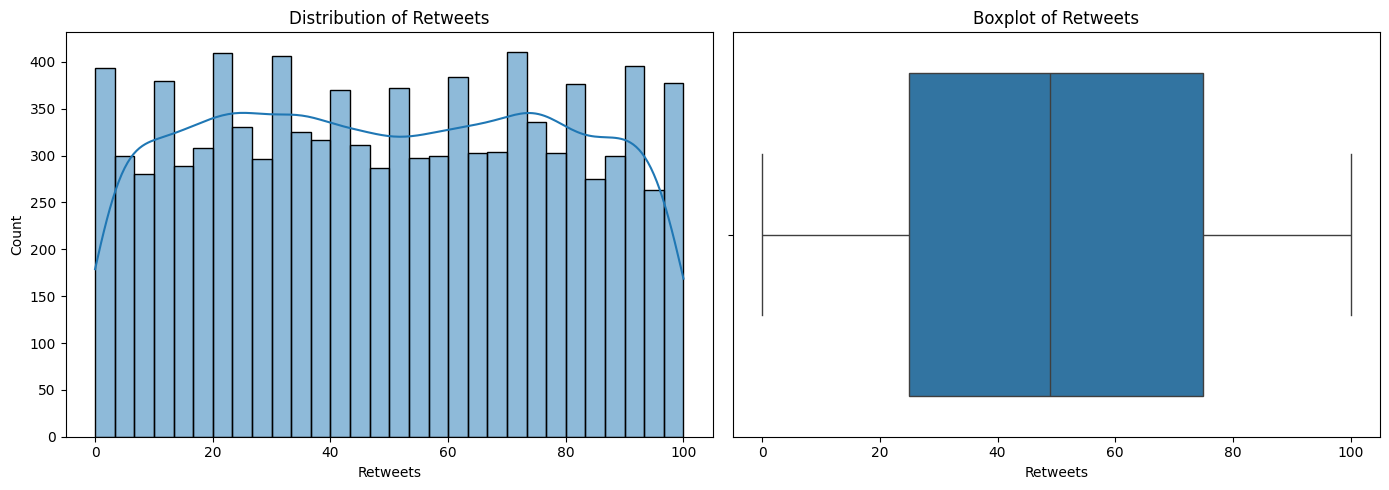

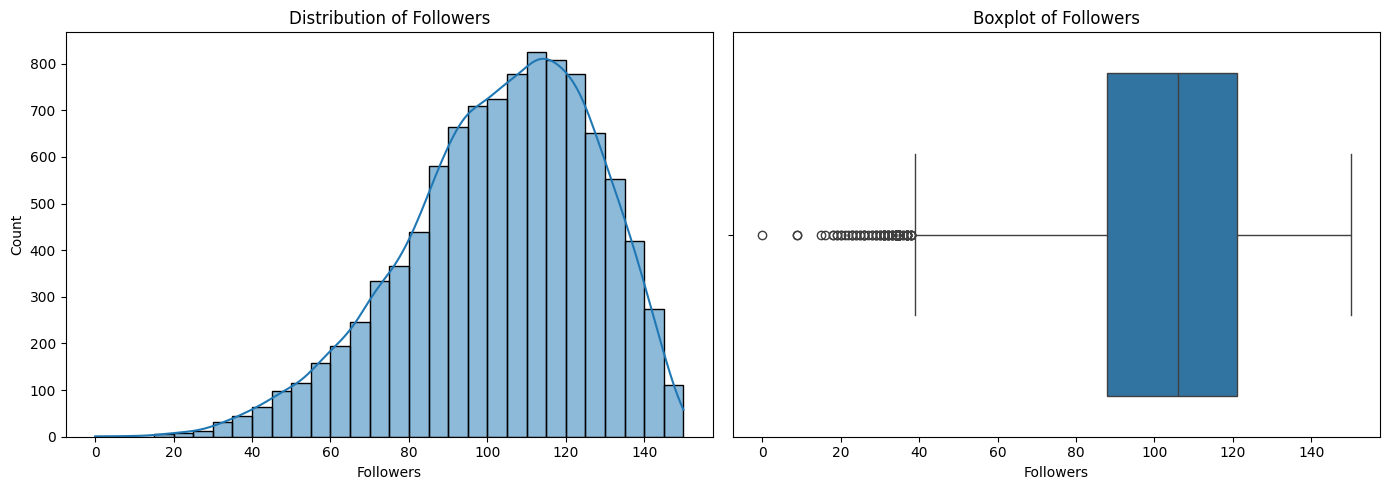

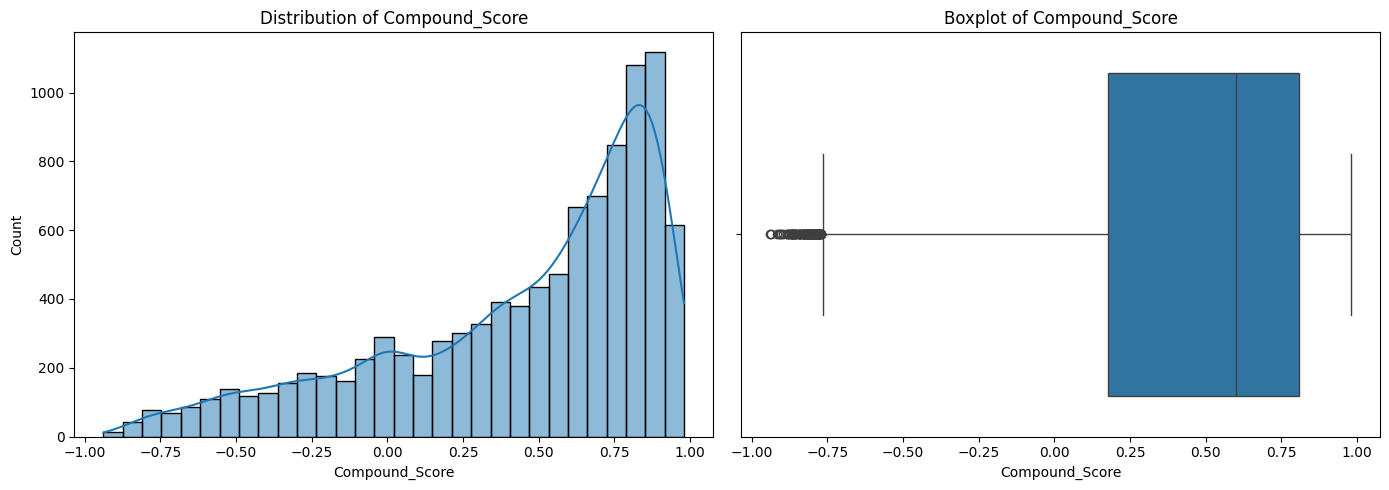

In [ ]:
#Numerical Columns
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to explore
num_cols = ['Likes', 'Retweets', 'Followers', 'Compound_Score']

# Plot histograms and boxplots for each
for col in num_cols:
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


/tmp/ipython-input-57-2306549766.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


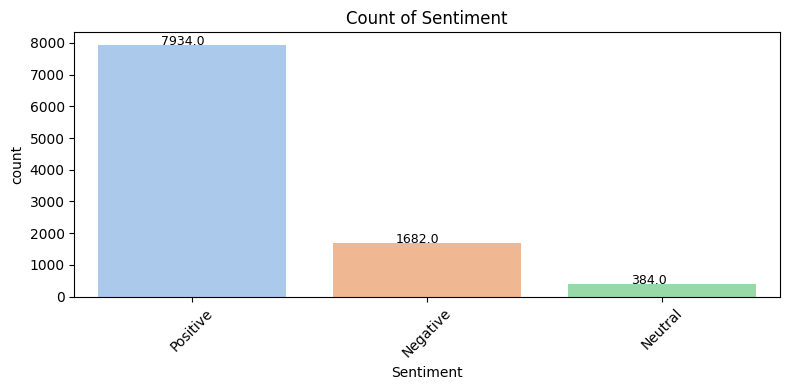

/tmp/ipython-input-57-2306549766.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


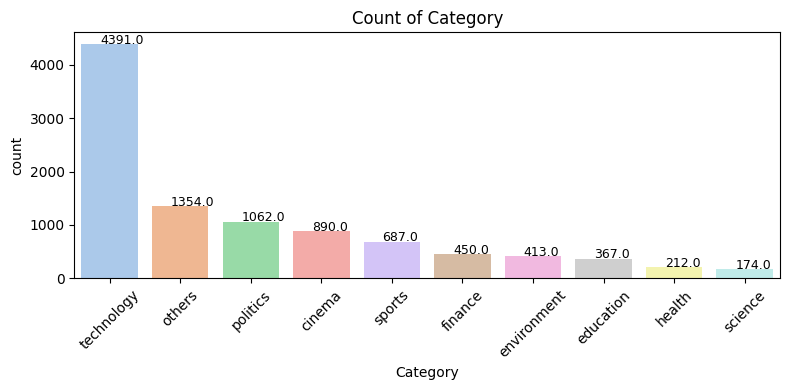

/tmp/ipython-input-57-2306549766.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


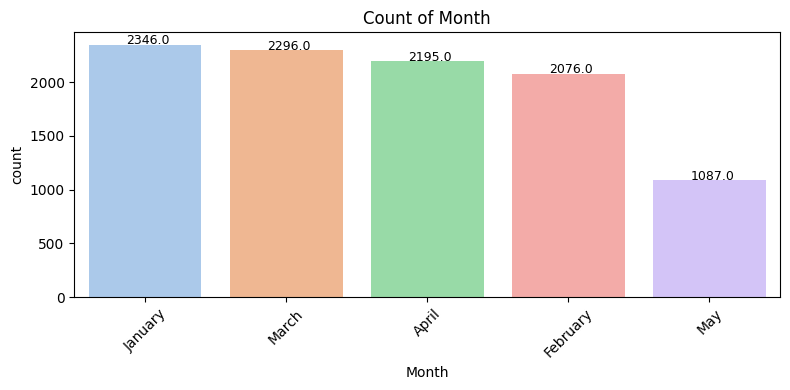

/tmp/ipython-input-57-2306549766.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


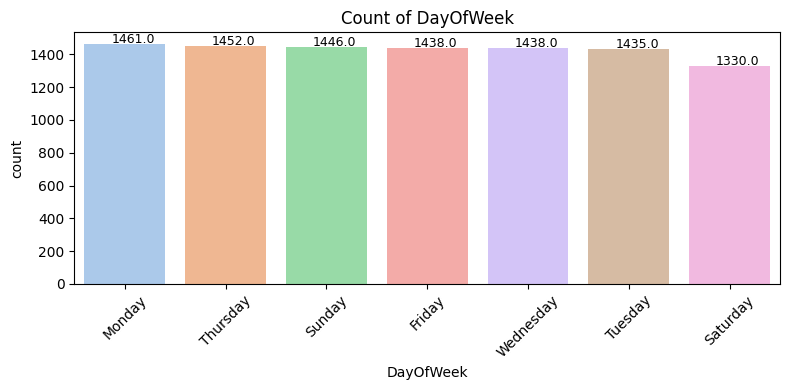

In [ ]:

if 'Month' not in df.columns:
    df['Month'] = df['date'].dt.month_name()

if 'DayOfWeek' not in df.columns:
    df['DayOfWeek'] = df['date'].dt.day_name()

cat_cols = ['Sentiment', 'Category', 'Month', 'DayOfWeek']

import matplotlib.pyplot as plt
import seaborn as sns

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 3, height + 5), fontsize=9)

    plt.tight_layout()
    plt.show()


7-Bivariate Analysis

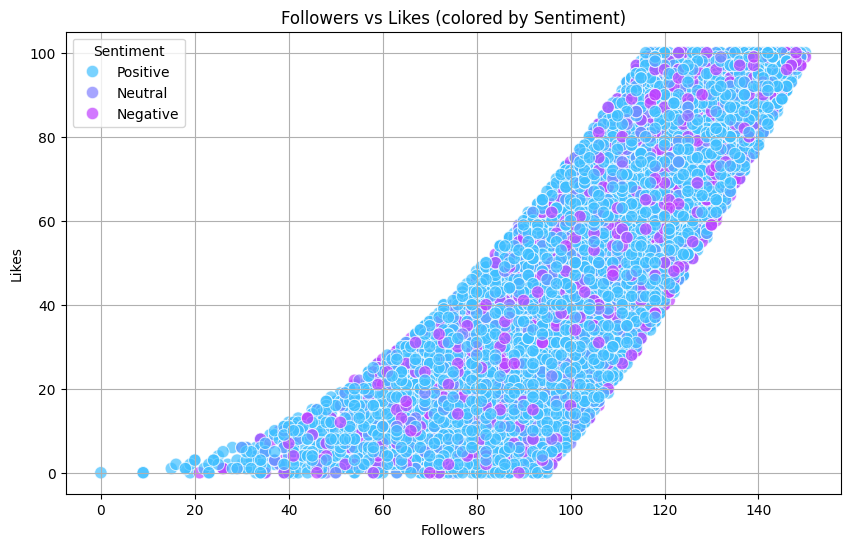

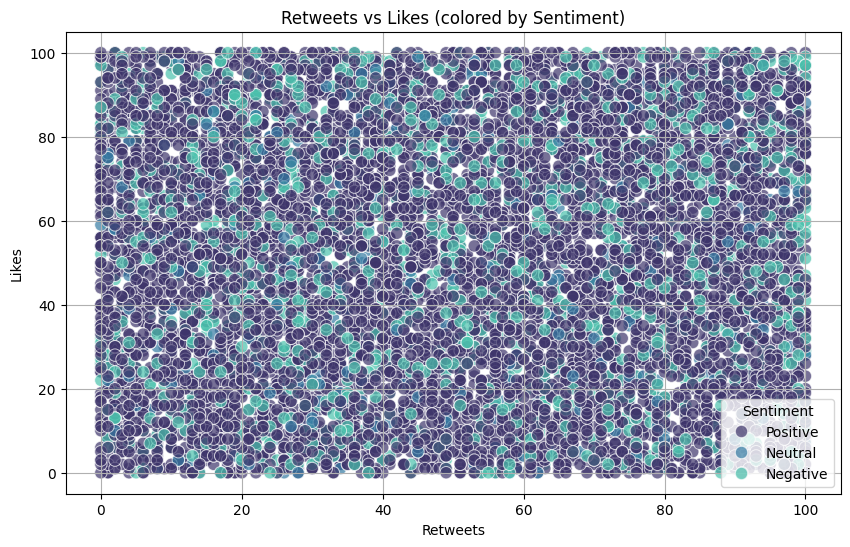

In [ ]:
#Numerical vs Numerical
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Followers', y='Likes', hue='Sentiment', palette='cool', alpha=0.7, s=80)
plt.title("Followers vs Likes (colored by Sentiment)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Retweets', y='Likes', hue='Sentiment', palette='mako', alpha=0.7, s=80)
plt.title("Retweets vs Likes (colored by Sentiment)")
plt.grid(True)
plt.show()


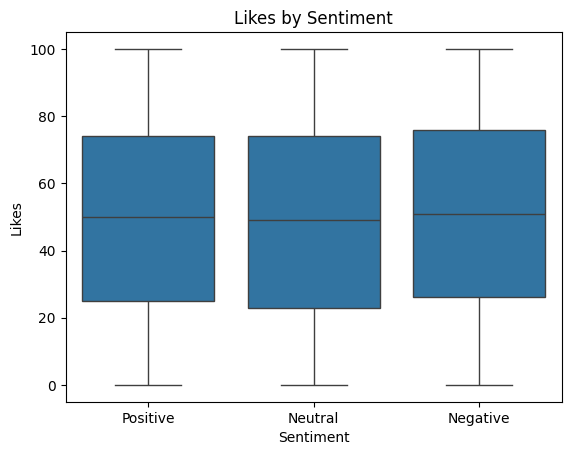

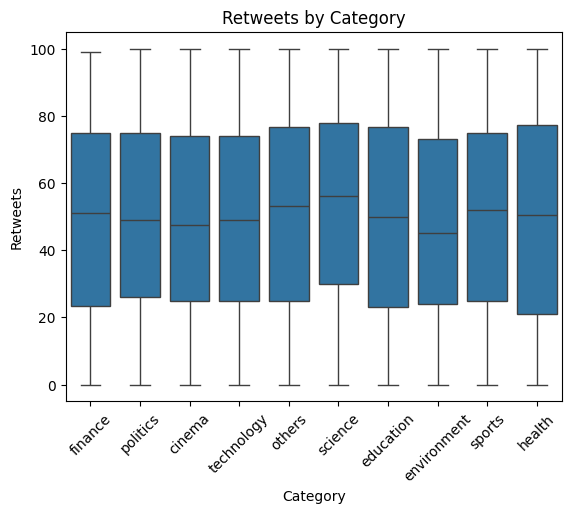

In [ ]:
###Categorical vs Numerical
# Sentiment vs Likes
sns.boxplot(data=df, x='Sentiment', y='Likes')
plt.title("Likes by Sentiment")
plt.show()

# Category vs Retweets
sns.boxplot(data=df, x='Category', y='Retweets')
plt.title("Retweets by Category")
plt.xticks(rotation=45)
plt.show()


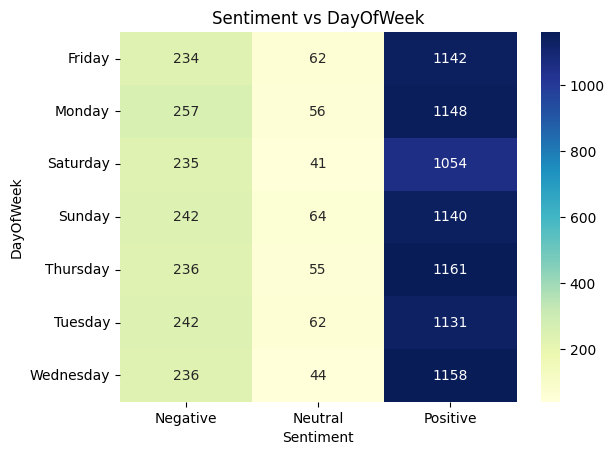

In [ ]:
###Categorical vs Categorical
# Crosstab: Sentiment vs DayOfWeek
crosstab = pd.crosstab(df['DayOfWeek'], df['Sentiment'])

# Heatmap
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Sentiment vs DayOfWeek")
plt.show()


8-Outlier Detection

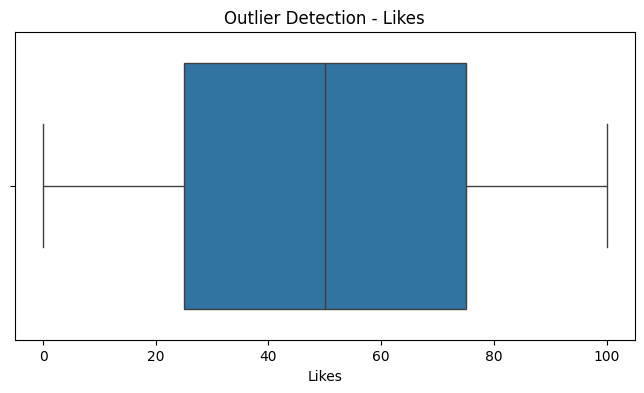

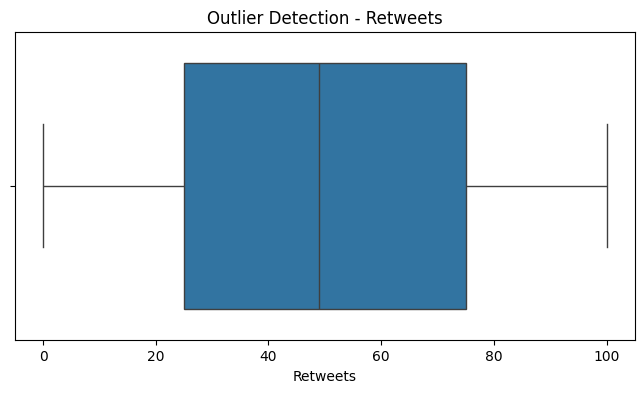

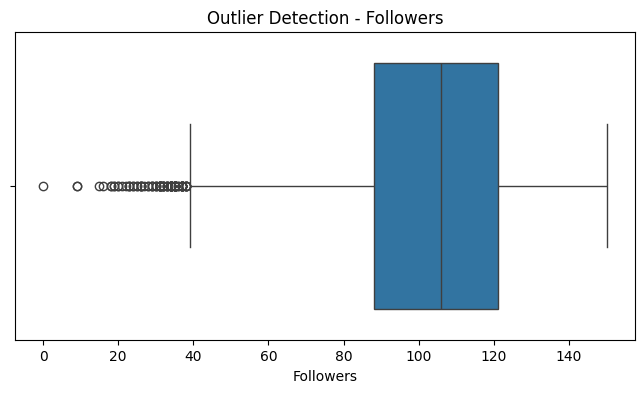

In [ ]:
#Visual Detection Using Boxplots
num_cols = ['Likes', 'Retweets', 'Followers']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Outlier Detection - {col}')
    plt.show()

In [ ]:
#Statistical Detection Using IQR (Interquartile Range)
def detect_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Outliers in 'Likes'
outliers_likes = detect_outliers_iqr('Likes')
print(f"Outliers in Likes: {len(outliers_likes)} rows")

# Some outlier rows
outliers_likes[['Username', 'Likes', 'Retweets', 'Followers']].head()


Outliers in Likes: 0 rows


,Username,Likes,Retweets,Followers


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Likes']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Likes'}, axis=1)
              .sort_values('Likes', ascending=True))
  xs = counted['Likes']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Likes', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Likes')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Retweets']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Retweets'}, axis=1)
              .sort_values('Retweets', ascending=True))
  xs = counted['Retweets']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Retweets', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Retweets')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Followers']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Followers'}, axis=1)
              .sort_values('Followers', ascending=True))
  xs = counted['Followers']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Followers', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Followers')
_ = plt.ylabel('count()')

In [ ]:
# Removing outliers across multiple columns
def remove_outliers_iqr(df, columns):
    filtered_df = df.copy()
    for col in columns:
        Q1 = filtered_df[col].quantile(0.25)
        Q3 = filtered_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        filtered_df = filtered_df[(filtered_df[col] >= lower_bound) & (filtered_df[col] <= upper_bound)]

    return filtered_df

# Columns to check for outliers
numeric_cols = ['Likes', 'Retweets', 'Followers']

df_cleaned = remove_outliers_iqr(df, numeric_cols)

print("Original rows:", len(df))
print("After removing outliers:", len(df_cleaned))


Original rows: 10000
After removing outliers: 9912


9-Correlation Analysis

In [ ]:
#Correlation Matrix
# Only numerical columns
numeric_df = df[['Likes', 'Retweets', 'Followers', 'Compound_Score']]

# Compute correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)

                   Likes  Retweets  Followers  Compound_Score
Likes           1.000000  0.012798   0.819374       -0.010871
Retweets        0.012798  1.000000   0.560719       -0.005240
Followers       0.819374  0.560719   1.000000       -0.011872
Compound_Score -0.010871 -0.005240  -0.011872        1.000000


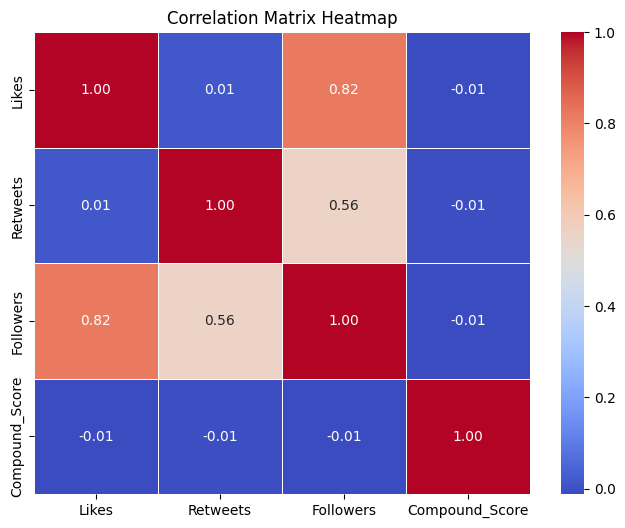

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


| Correlation Value | Meaning                      |
| ----------------- | ---------------------------- |
| +1                | Perfect positive correlation |
| 0                 | No correlation               |
| -1                | Perfect negative correlation |

10-Patterns & Hypothesis Generation

In [ ]:
#Insight 1: Negative tweets get more likes
df.groupby('Sentiment')['Likes'].mean()

,Likes
Sentiment,
Negative,51.246730
Neutral,49.096354
Positive,49.690320


In [ ]:
#Insight 2: Engagement varies by DayOfWeek
df.groupby('DayOfWeek')['Likes'].mean().sort_values(ascending=False)
#we can see Thursday and Tuesday has more likes

,Likes
DayOfWeek,
Thursday,50.567493
Tuesday,50.464111
Monday,50.065024
Saturday,50.031579
Sunday,50.030429
Friday,49.695410
Wednesday,48.650904


In [ ]:
#Insight 3: Some hashtags have higher average likes
df.groupby('hashtags1')['Likes'].mean().sort_values(ascending=False).head(10)

,Likes
hashtags1,
some,74.500000
success,74.230769
role,73.200000
even,72.714286
agree,72.214286
seem,72.090909
yeah,71.571429
space,71.500000
back,71.400000


In [ ]:
print("Insight 4: Avg Likes by Sentiment")
print(df.groupby('Sentiment')['Likes'].mean())

Insight 4: Avg Likes by Sentiment
Sentiment
Negative    51.246730
Neutral     49.096354
Positive    49.690320
Name: Likes, dtype: float64


In [ ]:
print("Insight 5: Avg Likes by Day of Week")
print(df.groupby('DayOfWeek')['Likes'].mean().sort_values(ascending=False))

Insight 5: Avg Likes by Day of Week
DayOfWeek
Thursday     50.567493
Tuesday      50.464111
Monday       50.065024
Saturday     50.031579
Sunday       50.030429
Friday       49.695410
Wednesday    48.650904
Name: Likes, dtype: float64


In [ ]:
print("Insight 6: Top 10 Hashtags with Highest Avg Likes")
print(df.groupby('hashtags1')['Likes'].mean().sort_values(ascending=False).head(10))

Insight 6: Top 10 Hashtags with Highest Avg Likes
hashtags1
some       74.500000
success    74.230769
role       73.200000
even       72.714286
agree      72.214286
seem       72.090909
yeah       71.571429
space      71.500000
back       71.400000
sense      70.888889
Name: Likes, dtype: float64


In [ ]:
print("Insight 7: Correlation between Likes and Followers =",
      df[['Likes', 'Followers']].corr().loc['Likes', 'Followers'])

Insight 7: Correlation between Likes and Followers = 0.8193742072515179


In [ ]:
print("Insight 8: Avg Retweets by Category (Shareability of Topics)")
print(df.groupby('Category')['Retweets'].mean().sort_values(ascending=False))

Insight 8: Avg Retweets by Category (Shareability of Topics)
Category
science        53.264368
others         51.086411
sports         50.362445
politics       50.136535
education      50.092643
health         49.702830
finance        49.564444
technology     49.191073
cinema         49.152809
environment    48.329298
Name: Retweets, dtype: float64


In [ ]:
# Save the cleaned dataset to CSV
df_cleaned.to_csv("tweets_cleaned_no_outliers.csv", index=False)

# Download the file
from google.colab import files
files.download("tweets_cleaned_no_outliers.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>